# KILT-8-HandsOnAnalysis_SelectionStrategies

- Analysis on KILT-6-get-data-for-incremental-data.ipynb results

In [1]:
from cycler import cycler
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pathlib
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import os
from rich.console import Console
from rich.table import Table

In [2]:
def get_table(title, columns, rows):

    table = Table(title=title)
    
    table.add_column("", justify="center")
    for column in columns:
        table.add_column(column, justify="center")
    
    for row in rows:
        table.add_row(*row)
        

    console = Console(record=True)
    console.print(table, justify="center")
#     console.save_text(f"./images/{title}")

In [3]:
raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]


light_palette = np.array(raw_light_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255

Light mode palette


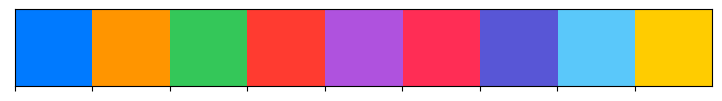

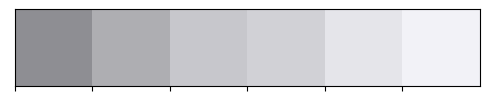

In [4]:
print('Light mode palette')
sns.palplot(light_palette)
sns.palplot(gray_light_palette)

In [5]:
# cmap 수정
mpl.rcParams['axes.prop_cycle'] = cycler('color',light_palette)
# 해상도 조정
mpl.rcParams['figure.dpi'] = 200
# ax의 우측과 상단 지우기
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

## KILT BM25 NQ negative (from DPR) depreciated

In [6]:
# option = 'bm25'
# path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ'
# # path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ_depreciated'
# plot_path = './img/FiDResultOnBM25HardnegativeNQdevSubsets.png'
# title = 'FiD result on BM25 negative nq dev subsets'

## KILT Random Sampling NQ negative  depreciated

In [7]:
# option = 'random'
# path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/FiDResultOnRandomSamplingnegativeNQdevSubsets.png'
# title = 'FiD result on random sampling negative nq dev subsets'

## KILT BM25 NQ negative (from DPR)

In [8]:
# option = 'bm25'
# path = '/data/philhoon-relevance/FiD/results/KILT_BM25_NQ'

## KILT Random Sampling NQ negative 

In [9]:
# option = 'random'
# path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/New_FiDResultOnRandomSamplingnegativeNQdev2539.png'
# title = 'New FiD result on random sampling negative nq dev subsets'

In [10]:
# path = pathlib.Path(path)

In [11]:
# files = path.glob('**/*.txt')
# pprint(list(files))

In [12]:
# dict_eval = {
#     'pos' : [],
#     'ctx' : [],
#     'em' : []
# }

# sample_size = 5
# for pos in range(1, sample_size+1):
#     for ctx in range(pos, sample_size+1):
    
# #         # bm25 negative filenames
# #         file_name_ = f'kilt_dpr_nq_dev_pos{pos}_context{ctx}'

#         # random sampling negative filenames
#         if option == 'random':
#             file_name_ = f'kilt_rand_nq_dev_pos{pos}_context{ctx}'
#             file = list(path.glob(f'*{file_name_}*/*.txt'))
#             test = file[0] 
#         # DPR should be changed to bm25
#         if option == 'bm25':
#             file_name_ = f'kilt_bm25_nq_dev_pos{pos}_context{ctx}'
#             file = list(path.glob(f'*{file_name_}*/*.txt'))
#             test = file[0] 
        
#         print(test)
        
#         df = pd.read_csv(test, sep = '\t', header=None)
#         df.columns = ['id','inference','em']
#         print(len(df))
#         em = float(sum(df['em'])/len(df))
        
#         dict_eval['pos'].append(pos)
#         dict_eval['ctx'].append(ctx)
#         dict_eval['em'].append(em)
        
        

## KILT BM25 NQ incremetal result (from DPR)

In [13]:
# '/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/incremental_result/pos1_ctx1.json'
pos = 1
sample_size = 5
path2 = '/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/incremental_result/'

In [14]:
path2 = pathlib.Path(path2)
files = path2.glob(f'pos{pos}*.txt')
pprint(list(files))

[PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/incremental_result/pos1_ctx5.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/incremental_result/pos1_ctx2.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/incremental_result/pos1_ctx3.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/incremental_result/pos1_ctx4.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/incremental_result/pos1_ctx1.txt')]


In [15]:
incre_em = {
    'ctx' : [],
    'em' : [],   
}
for i in range(pos, sample_size+1):
    file_name_ = f'pos{pos}_ctx{i}.txt'
    file = list(path2.glob(file_name_))
    test = file[0] 
    incre_em['ctx'].append(i)
    with open(test, 'r') as f:
        em_ = float(f.readline().split()[-3])
        incre_em['em'].append(em_)

In [16]:
incre_em

{'ctx': [1, 2, 3, 4, 5],
 'em': [0.6786136274123671,
  0.7038204017329658,
  0.7227254824734147,
  0.7325718786923986,
  0.7388735722725482]}

In [17]:
def get_lowerbound(incre_em):
    index_min = np.argmin(incre_em['em'])
    return incre_em['ctx'][index_min], incre_em['em'][index_min]

In [18]:
def get_upperbound(incre_em):
    index_max = np.argmax(incre_em['em'])
    return incre_em['ctx'][index_max], incre_em['em'][index_max]

In [19]:
upper_ctx, upper_em = get_upperbound(incre_em)

In [20]:
print(upper_ctx, upper_em)

5 0.7388735722725482


In [21]:
lower_ctx, lower_em = get_lowerbound(incre_em)

In [22]:
print(lower_ctx, lower_em)

1 0.6786136274123671


## KILT BM25 NQ selection strategy result

In [23]:
option_dict = {
    'op1' : 'remove_damage',
    'op2' : 'remove_damage_irrelevant',
    'op3' : 'remove_damage_relevant',
    'op4' : 'remove_damage_irrelevant_relevant',
}
# option = 'op4'

In [24]:
option_p_dict = {
    'strict' : 'strict_positive',
    'naive' : 'naive_positive',
}
# option_p = 'strict'

In [25]:
option_d_dict = {
    'strict' : 'strict_damaging',
    'naive' : 'naive_damaging',
}
# option_d = 'strict'

In [26]:
input_path = '/data/philhoon-relevance/FiD/results/NQ_KILT_BM25_SELECTION'

In [27]:
in_path = pathlib.Path(input_path)
# files = in_path.glob(f'**/*.txt')
# pprint(list(files))

In [28]:
dict_eval = {
    'strategy' : [],
    'em' : []
}

for op in option_dict.keys():
    for op_p in option_p_dict.keys():
        for op_d in option_d_dict.keys():
            strategy_ = f'{option_p_dict[op_p]}_{option_d_dict[op_d]}_{option_dict[op]}'
            strategy_name = f'{op}_{op_p}_{op_d}'
            print(strategy_name)
            strategy_path = pathlib.Path(input_path, strategy_)
            file = list(strategy_path.glob(f'*.txt'))
            if len(file) != 1:
                print('There should be 1 file per each path')
            else:
                test = file[0] 
            
#             print(test)
            df = pd.read_csv(test, sep = '\t', header=None)
            df.columns = ['id','inference','em']
#             print(len(df))
            em = float(sum(df['em'])/len(df))
        
            dict_eval['strategy'].append(strategy_name)
            dict_eval['em'].append(em)
            

op1_strict_strict
op1_strict_naive
op1_naive_strict
op1_naive_naive
op2_strict_strict
op2_strict_naive
op2_naive_strict
op2_naive_naive
op3_strict_strict
op3_strict_naive
op3_naive_strict
op3_naive_naive
op4_strict_strict
op4_strict_naive
op4_naive_strict
op4_naive_naive


In [29]:
def merge(incre_em, dict_eval):
    column_names = []
    row_values = []
    upper_ctx, upper_em = get_upperbound(incre_em)
    lower_ctx, lower_em = get_lowerbound(incre_em)
    column_names.append('UpperBound-AccumulatedEm')
    column_names.append('LowerBound-PositiveOneEm')
    row_values.append(str(upper_em))
    row_values.append(str(lower_em))
    
    for strat_, em_ in zip(dict_eval['strategy'], dict_eval['em']):
        column_names.append(strat_)
        row_values.append(str(em_))
        
    return column_names, row_values
    

In [30]:
col_lst, value_lst = merge(incre_em, dict_eval)

In [31]:
print(col_lst)
print(value_lst)

['UpperBound-AccumulatedEm', 'LowerBound-PositiveOneEm', 'op1_strict_strict', 'op1_strict_naive', 'op1_naive_strict', 'op1_naive_naive', 'op2_strict_strict', 'op2_strict_naive', 'op2_naive_strict', 'op2_naive_naive', 'op3_strict_strict', 'op3_strict_naive', 'op3_naive_strict', 'op3_naive_naive', 'op4_strict_strict', 'op4_strict_naive', 'op4_naive_strict', 'op4_naive_naive']
['0.7388735722725482', '0.6786136274123671', '0.6845214651437573', '0.7365104371799921', '0.6845214651437573', '0.7365104371799921', '0.7113036628593935', '0.7113036628593935', '0.7113036628593935', '0.7113036628593935', '0.6860968885387948', '0.7361165813312328', '0.6845214651437573', '0.7365104371799921', '0.709728239464356', '0.709728239464356', '0.7113036628593935', '0.7113036628593935']


In [32]:
def get_table(title, columns, rows):

    table = Table(title=title)
    
    table.add_column("", justify="center")
    for column in columns:
        table.add_column(column, justify="center")
    
    if any(isinstance(i, list) for i in rows):
        for row in rows:
            table.add_row(*row)
    else:
#         print(rows)
        name = 'result'
        single_row = [name] + rows
        table.add_row(*single_row)
        

    console = Console(record=True)
    console.print(table, justify="center")
#     console.save_text(f"./images/{title}")

In [53]:
option_dict = {
    'op1' : 'remove_damage',
    'op2' : 'remove_damage_irrelevant',
    'op3' : 'remove_damage_relevant',
    'op4' : 'remove_damage_irrelevant_relevant',
}
option_p_dict = {
    'strict' : 'strict_positive', # - decreasing # of positive passages
    'naive' : 'naive_positive', # - increasing # of positive passage
}
option_d_dict = {
    'strict' : 'strict_damaging', # - decreasing # of damaging passages
    'naive' : 'naive_damaging', # - increasing # of damaging passages
}

In [48]:
unit = 2
s_ind = 0
e_ind = s_ind + unit
title = 'Strategy Selection Table'
get_table(title, col_lst[s_ind:e_ind], value_lst[s_ind:e_ind])

                    Strategy Selection Table                                              
                         ┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓                          
                         ┃        ┃ UpperBound-AccumulatedEm ┃ LowerBound-PositiveOneEm ┃                          
                         ┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩                          
                         │ result │    0.7388735722725482    │    0.6786136274123671    │                          
                         └────────┴──────────────────────────┴──────────────────────────┘

In [49]:
unit = 4
title = 'Strategy Selection Table op1'
s_ind = e_ind
e_ind = s_ind + unit
get_table(title, col_lst[s_ind:e_ind], value_lst[s_ind:e_ind])

                                 Strategy Selection Table op1                                            
          ┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓           
          ┃        ┃ op1_strict_strict  ┃  op1_strict_naive  ┃  op1_naive_strict  ┃  op1_naive_naive   ┃           
          ┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩           
          │ result │ 0.6845214651437573 │ 0.7365104371799921 │ 0.6845214651437573 │ 0.7365104371799921 │           
          └────────┴────────────────────┴────────────────────┴────────────────────┴────────────────────┘

## op1 result - remove_damage
    - positive option won't effect the result
    - naive damaging - increasing # of damaging passages -> better result
### Conclusion 
     - 1. Adding relevant passages won't affect the result when there is a positive passage 
     - 2. Removing irrelevant passages gives the better result because it removes passages that might be damaging

In [50]:
title = 'Strategy Selection Table op2'
s_ind = e_ind
e_ind = s_ind + unit
get_table(title, col_lst[s_ind:e_ind], value_lst[s_ind:e_ind])

                                 Strategy Selection Table op2                                            
          ┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓           
          ┃        ┃ op2_strict_strict  ┃  op2_strict_naive  ┃  op2_naive_strict  ┃  op2_naive_naive   ┃           
          ┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩           
          │ result │ 0.7113036628593935 │ 0.7113036628593935 │ 0.7113036628593935 │ 0.7113036628593935 │           
          └────────┴────────────────────┴────────────────────┴────────────────────┴────────────────────┘

## op2 result - remove_damage_irrelevant
    - All results have to be same since we are removing all damaging and irrelevants
    - Removing increased number of damages passages shows better performance OVERALL
        - that is because we are reducing the possibility of damaging passages
    
#### Conclusion 
    - 1. Removing increased number of damages passages shows better performance OVERALL
        - that is because we are reducing the possibility of damaging passages
    - 2. op1_strict_naive BETTER (Removing all damages_irrelevant < only damaging)
         - However, this is partially because this one removes even the first context (positive context)
    - 3. Removing irrelevant passages gives the better result because it removes passages that might be damaging

In [51]:
title = 'Strategy Selection Table op3'
s_ind = e_ind
e_ind = s_ind + unit
get_table(title, col_lst[s_ind:e_ind], value_lst[s_ind:e_ind])

                                 Strategy Selection Table op3                                            
          ┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓           
          ┃        ┃ op3_strict_strict  ┃  op3_strict_naive  ┃  op3_naive_strict  ┃  op3_naive_naive   ┃           
          ┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩           
          │ result │ 0.6860968885387948 │ 0.7361165813312328 │ 0.6845214651437573 │ 0.7365104371799921 │           
          └────────┴────────────────────┴────────────────────┴────────────────────┴────────────────────┘

## op3 result - remove_damage_relevant
    - op3 is done to check the performance drop when removing relevant
    - dropping relevant passages 
    
    - strict vs naive on damaging (2nd position)
        - Removing increased number of damages passages shows better performance
        - op3_strict_strict vs op3_strict_naive
        - op3_naive_strict vs op3_naive_naive
    
    - strict vs naive on positive (1st position)
        - Once it has the positive passages, adding more relevant passage won't matter
            - neglible difference
        
#### Conclusion 
     - 1. Removing all damages and irrelevant shows lower performance than just removing damaging
         - However, this is partially because this one removes even the first context (positive context)
     - 2. Removing irrelevant passages gives the better result because it removes passages that might be damaging

In [52]:
title = 'Strategy Selection Table op4'
s_ind = e_ind
e_ind = s_ind + unit
get_table(title, col_lst[s_ind:e_ind], value_lst[s_ind:e_ind])

                                Strategy Selection Table op4                                            
           ┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓            
           ┃        ┃ op4_strict_strict ┃ op4_strict_naive  ┃  op4_naive_strict  ┃  op4_naive_naive   ┃            
           ┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩            
           │ result │ 0.709728239464356 │ 0.709728239464356 │ 0.7113036628593935 │ 0.7113036628593935 │            
           └────────┴───────────────────┴───────────────────┴────────────────────┴────────────────────┘

## op4 result - remove_damage_irrelevant_relevant 
    - since we are dropping damage+irrelevant 
        op4_strict_strict = op4_strict_naive
        op4_naive_strict = op4_naive_naive
    
    
    - strict vs naive on positive (1st position)
        - Adding extra positive shows better 
            - However, neglible difference
        
#### Conclusion 
     - 1. Limiting the number of positive passage show lower performance but better result 

# Conclusion
    - Dropping damages + irrelevant reduces the possibility of damaging effect
    - Once we have positive passages, adding extra does not show substantial difference
    - However, keeping them shows better result overall
        - For performance, keep them
        - For resource, discard them